In [2]:
%pip install seaborn --quiet

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


## 1. Problema

Clasificacion binaria: Definir si un estudiante pasara su examen final (Pass/Fail) segun sus datos academicos y personales

Metricas de exito: Accuracy y F1-score

In [3]:
# cargando los datos 
data = pd.read_csv('data/student_info.csv')

In [4]:
# observacion de los datos
data.head()

,student_id,name,gender,age,grade_level,math_score,reading_score,writing_score,attendance_rate,parent_education,study_hours,internet_access,lunch_type,extra_activities,final_result
0,S1,Student_1,Other,17,10,74,61,90,94.660002,Master's,4.120192,Yes,Free or reduced,Yes,Fail
1,S2,Student_2,Male,17,12,99,70,91,93.173227,Bachelor's,2.886505,No,Free or reduced,No,Pass
2,S3,Student_3,Other,17,9,59,60,99,98.631098,PhD,1.909926,No,Free or reduced,No,Fail
3,S4,Student_4,Other,17,12,70,88,69,96.419620,PhD,1.664740,No,Standard,No,Pass
4,S5,Student_5,Male,15,9,85,77,94,91.332105,PhD,2.330918,Yes,Free or reduced,No,Pass


In [5]:
data.columns

Index(['student_id', 'name', 'gender', 'age', 'grade_level', 'math_score',
       'reading_score', 'writing_score', 'attendance_rate', 'parent_education',
       'study_hours', 'internet_access', 'lunch_type', 'extra_activities',
       'final_result'],
      dtype='object')

In [6]:
# 1000 filas y 15 columnas
data.shape

(1000, 15)

In [7]:
# no tenemos datos nulos o vacios
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        1000 non-null   object 
 1   name              1000 non-null   object 
 2   gender            1000 non-null   object 
 3   age               1000 non-null   int64  
 4   grade_level       1000 non-null   int64  
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   attendance_rate   1000 non-null   float64
 9   parent_education  1000 non-null   object 
 10  study_hours       1000 non-null   float64
 11  internet_access   1000 non-null   object 
 12  lunch_type        1000 non-null   object 
 13  extra_activities  1000 non-null   object 
 14  final_result      1000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 117.3+ KB


In [8]:
data.describe()

,age,grade_level,math_score,reading_score,writing_score,attendance_rate,study_hours
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,15.999000,10.473000,75.165000,74.293000,75.150000,89.879179,2.978380
std,0.817109,1.136029,14.304349,14.312652,14.395094,5.725007,1.167780
min,15.000000,9.000000,50.000000,50.000000,50.000000,80.000614,1.015673
25%,15.000000,9.000000,63.000000,62.000000,63.000000,84.971772,1.955287
50%,16.000000,10.000000,75.000000,74.000000,75.000000,89.980889,2.962665
75%,17.000000,12.000000,88.000000,86.000000,88.000000,94.629778,3.994360
max,17.000000,12.000000,99.000000,99.000000,99.000000,99.954988,4.997843


In [9]:
# se observa que los datos entre mujeres, hombres y otroos suelen ser casi los mismos
data['gender'].value_counts()

gender
Male      355
Female    326
Other     319
Name: count, dtype: int64

In [10]:
# se obesar que entre los que pasaron el examen y los que no hay un balance
data['final_result'].value_counts()

final_result
Pass    517
Fail    483
Name: count, dtype: int64

In [11]:
# Podemos observar que hay 0 datos duplicados
data.duplicated().sum()

np.int64(0)

## 2.Analisis exploratorio de datos EDA

#### Datos de los estudiantes
- student_id: Identificador del estudiante (Categorico:Ordinal)
- name: Nombre del estudiante (Categorico:Nominal)
- gender: Genero del estudiante (Categorico:Nominal)
- age: Edad del estudiante (Numerico:Discreto)
- grade_level: Ano particular de educacion (Numerico:Discreto)
- math_score: Puntaje en matematicas (Numerico:Continuo)
- reading_score: Puntaje de lectura (Numerico:Continuo)
- writing_score: Puntaje de escritura (Numerico:Continuo)
- attendance_rate: Tasa de asistencia en contexto instituacional (Numerico:Continuo)
- parent_education: Grado de educacion (Categorico:Ordinal)
- study_hours: horas de estudio (Categorico:Continuo)
- internet_access: Acceso a internet Si/No (Categorico:Binario)
- lunch_type: Comida ligera antes del almuerzo o cena (Categorico:Nominal)
- extra_activities: Actividades extra (Si/No) (Categorico:Binario)
- final_result: Resultado final Pass/Fail [target] (Categorico:Binario)

### 2.1 Analisis univariable

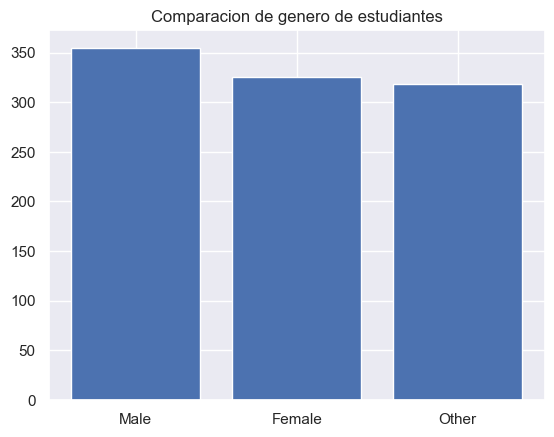

In [12]:
# Categorias
categorias = ["Male", "Female", "Other"]
valores = data[["gender"]].value_counts()

plt.bar(categorias, valores)
plt.title("Comparacion de genero de estudiantes")
plt.show()

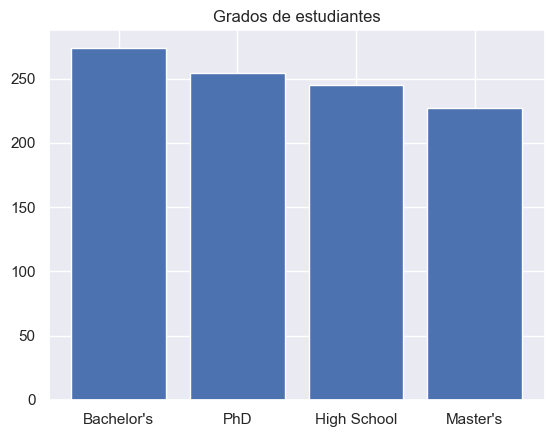

In [13]:
categorias = ["Bachelor's", "PhD", "High School", "Master's"]
valores = data["parent_education"].value_counts()

plt.bar(categorias, valores)
plt.title("Grados de estudiantes")
plt.show()

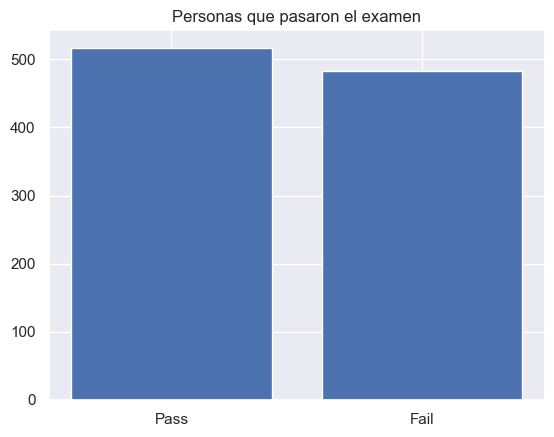

In [14]:
# Podemoos  ver que hay mas personas que pasaron el examen de los que fallaron
categorias = ["Pass", "Fail"]
values = data[['final_result']].value_counts()

plt.bar(categorias, values)
plt.title("Personas que pasaron el examen")
plt.show()

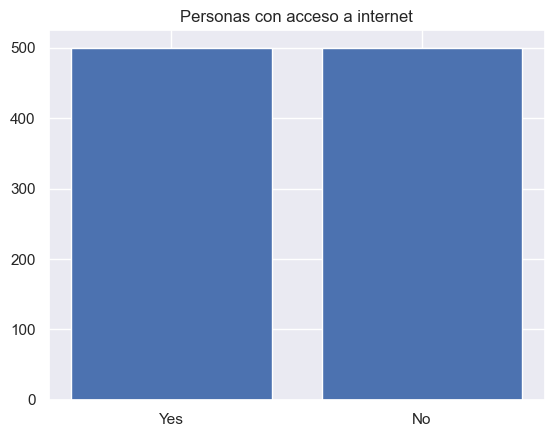

In [15]:
# Entre las personas que tienen y no tienen internet estan bastante equitativos
categorias = ["Yes", "No"]
values = data[["internet_access"]].value_counts()

plt.bar(categorias, values)
plt.title("Personas con acceso a internet")
plt.show()

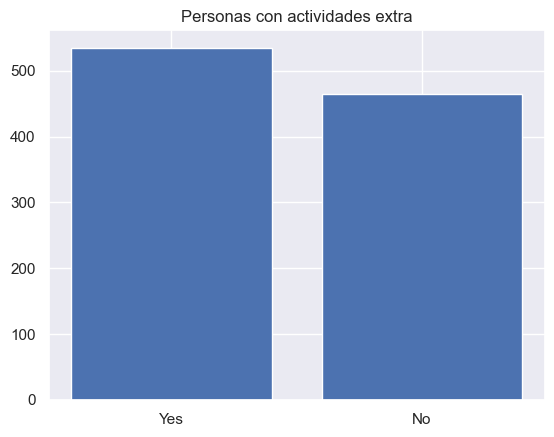

In [16]:
# hay una mayoria de personas que realizan actividades extra en comparacion a las que no
categories = ["Yes", "No"]
values = data[['extra_activities']].value_counts()

plt.bar(categories, values)
plt.title("Personas con actividades extra")
plt.show()

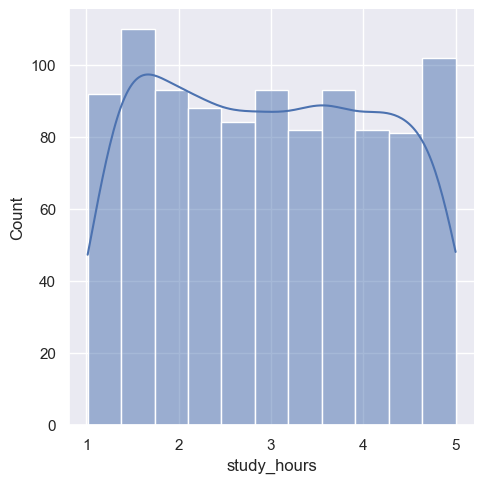

In [17]:
sns.displot(data=data, x='study_hours', kde=True)

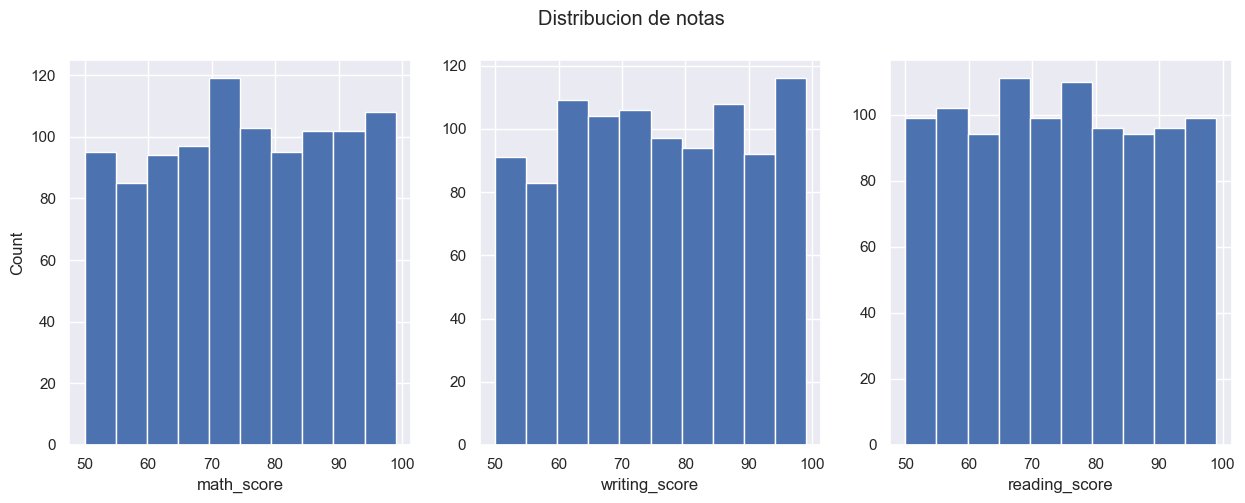

In [18]:
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
fig.suptitle('Distribucion de notas')
axes[0].hist(data=data, x='math_score')
axes[0].set_ylabel('Count')
axes[0].set_xlabel("math_score")
axes[1].hist(data=data, x='writing_score')
axes[1].set_xlabel("writing_score")
axes[2].hist(data=data, x='reading_score')
axes[2].set_xlabel("reading_score")
plt.show()

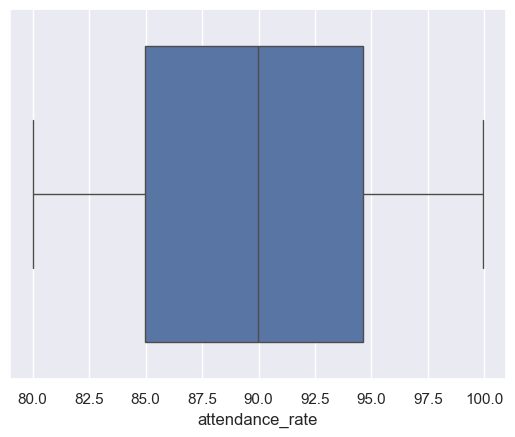

In [19]:
# hay un promedio de 90% de asistencia entre los estudiantes
sns.boxplot(data=data, x='attendance_rate')
plt.show()

### 2.2 Analisis Bivariable

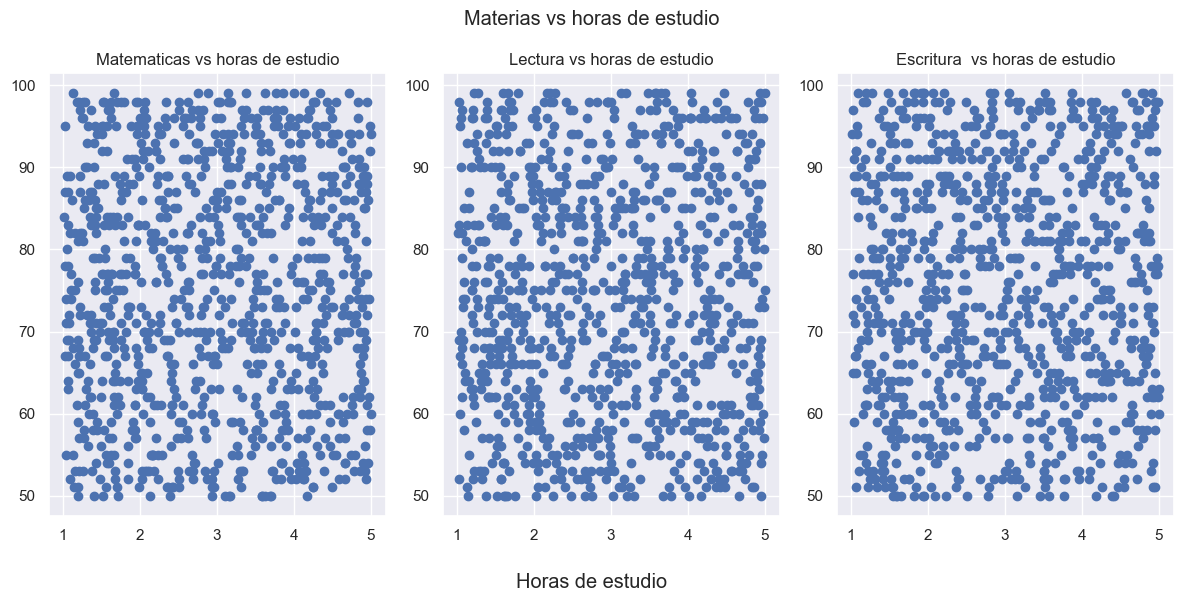

In [20]:
x = "study_hours"

fig, ax = plt.subplots(1, 3, figsize=(12, 6))
fig.suptitle("Materias vs horas de estudio")
fig.supxlabel("Horas de estudio")

ax[0].scatter(data=data, x=x, y="math_score")
ax[0].set_title("Matematicas vs horas de estudio")
ax[1].scatter(data=data, x=x, y="reading_score")
ax[1].set_title("Lectura vs horas de estudio")
ax[2].scatter(data=data, x=x, y="writing_score")
ax[2].set_title("Escritura  vs horas de estudio")

plt.tight_layout()
plt.show()

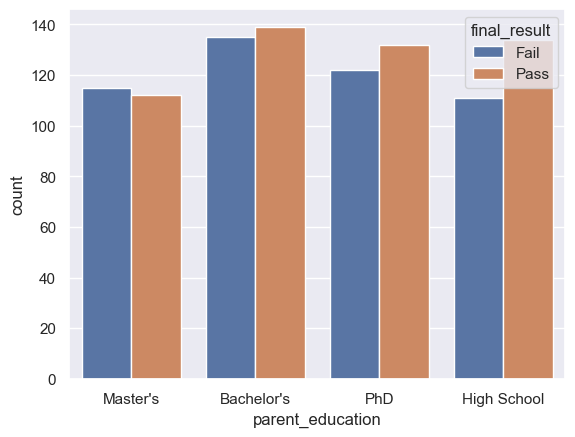

In [ ]:
# Se puede ver como la mayoria tiene padres con grado universitario, suelen ser estos los que pasan y a su vez
# Los que mas fallan, mientras que los de padres con grado escolar, suelen pasar mas los examenes y fallarlos
# menos
sns.countplot(data=data, x='parent_education', hue='final_result')
plt.show()

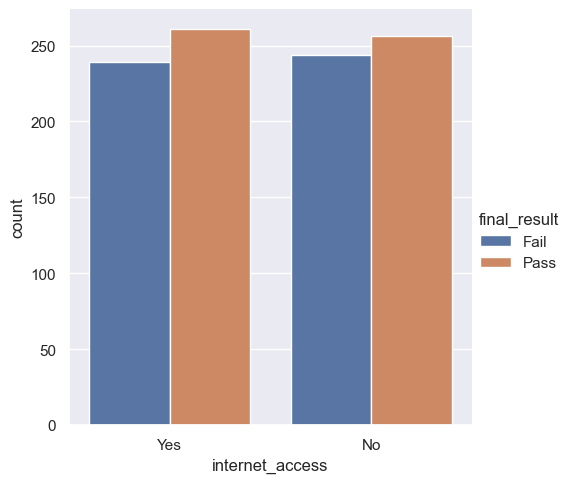

In [22]:
# no hay tanta diferencia, pero se puede notar una pequeña diferencia
# entre las personas que tienen internet suelen tener un poco mas de ventaja que los que no
sns.catplot(data=data, x='internet_access', hue='final_result', kind='count')

In [23]:
promedio = data.groupby('internet_access')[['math_score', 'reading_score', 'writing_score']].mean()
promedio.head()

,math_score,reading_score,writing_score
internet_access,,,
No,75.08,74.344,74.914
Yes,75.25,74.242,75.386


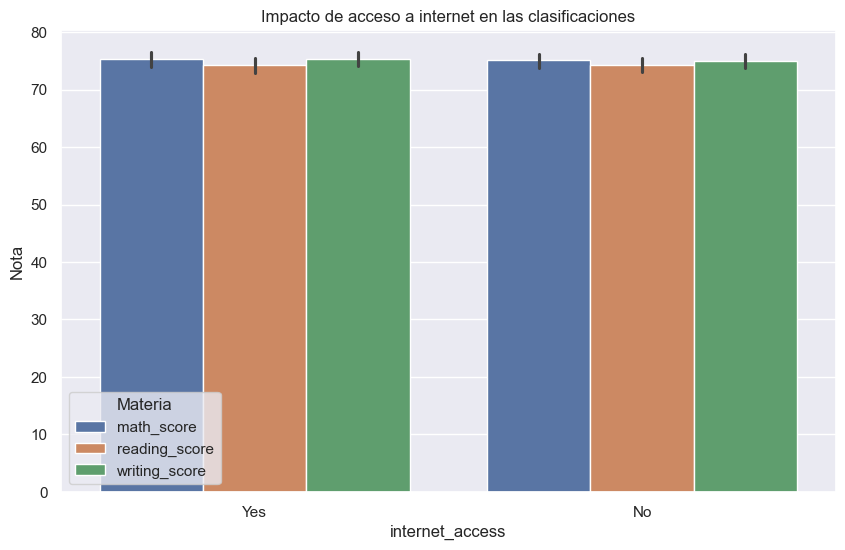

In [33]:
# No hay muchas muchas diferencias entre las notas respecto a si los estudiantes tienen o no internet
data_melted = data.melt(id_vars="internet_access",
                        value_vars=["math_score", "reading_score", "writing_score"],
                        var_name="Materia",
                        value_name="Nota")

plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x="internet_access", y="Nota", hue="Materia")
plt.title("Impacto de acceso a internet en las clasificaciones")
plt.show()